'컴과_학종_석차등급.xlsx' 파일을 성공적으로 불러왔습니다!


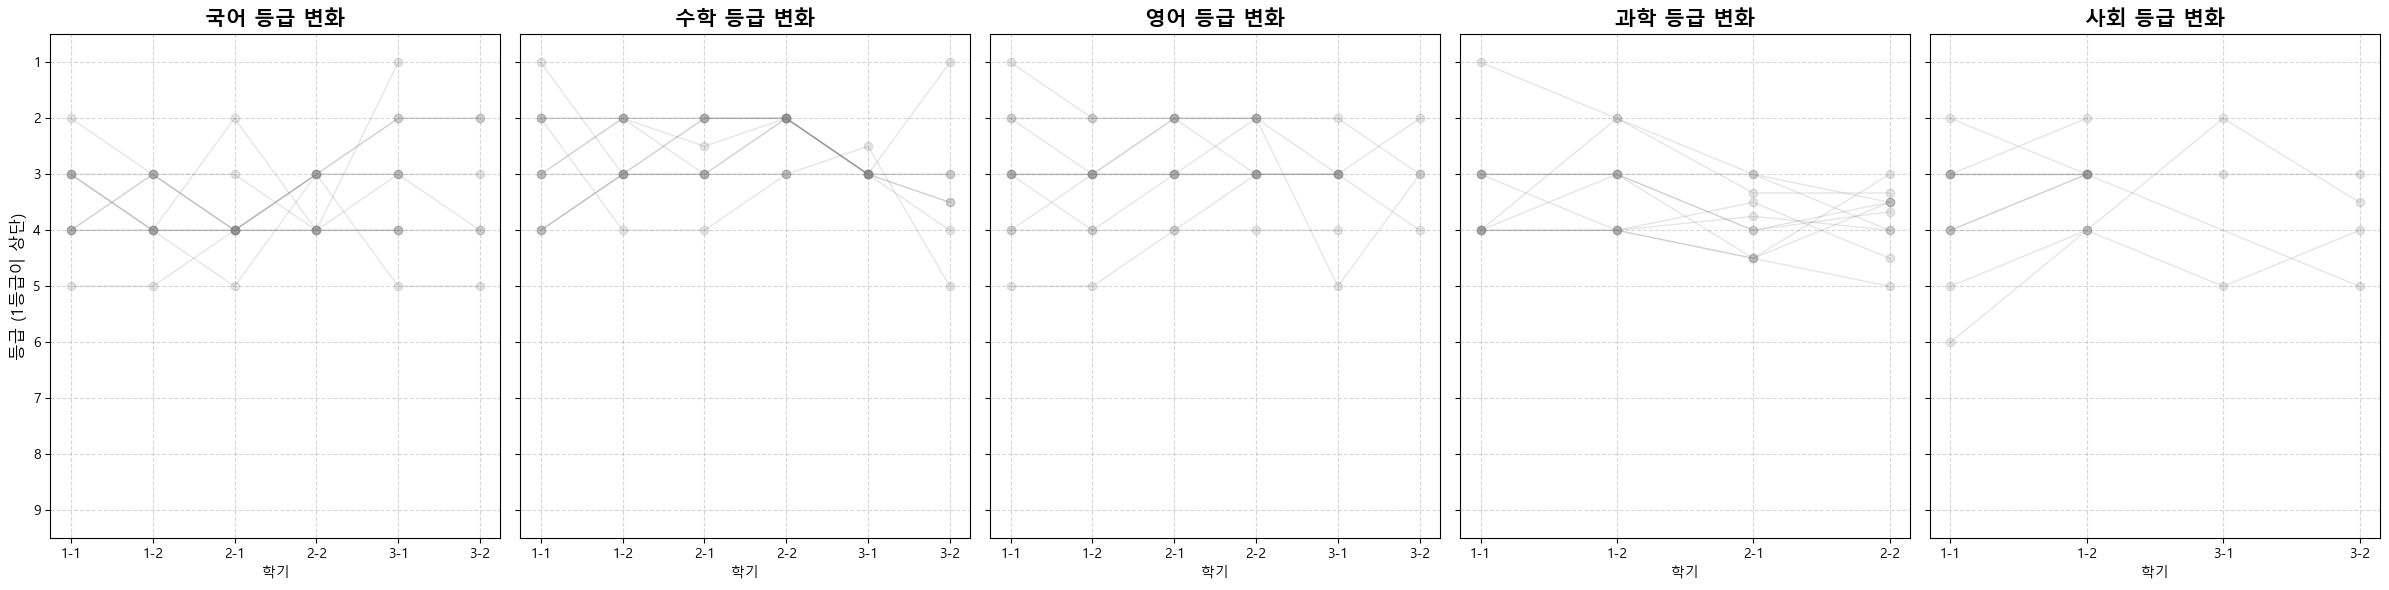

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform

# 1. 한글 폰트 설정
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False 

# 2. 데이터 불러오기
file_name = '컴과_학종_석차등급.xlsx'

try:
    # 엑셀 파일 읽기
    df = pd.read_excel(file_name)
    print(f"'{file_name}' 파일을 성공적으로 불러왔습니다!")
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다. '{file_name}' 파일이 같은 폴더에 있는지 확인해주세요.")
    raise
except Exception as e:
    print(f"파일을 여는 중 오류가 발생했습니다: {e}")
    raise

# 3. 데이터 전처리
semesters = ['1-1', '1-2', '2-1', '2-2', '3-1', '3-2']
subject_keywords = {
    '국어': ['국어'],
    '수학': ['수학'],
    '영어': ['영어'],
    '사회': ['통사', '사탐', '한국사', '윤리', '지리', '역사', '일반사회'], 
    '과학': ['통과', '과탐', '물', '화', '생', '지']
}

long_data = []

for idx, row in df.iterrows():
    student_name = row['이름']
    
    for sem in semesters:
        for subj_name, keywords in subject_keywords.items():
            relevant_cols = []
            for col in df.columns:
                if col.startswith(sem):
                    col_suffix = col[len(sem):]
                    if any(k in col_suffix for k in keywords):
                        relevant_cols.append(col)
            
            grades = []
            for col in relevant_cols:
                val = row[col]
                if pd.notnull(val):
                    try:
                        grades.append(float(val))
                    except ValueError:
                        pass 
            
            if grades:
                avg_grade = np.mean(grades)
                long_data.append({
                    '학생': student_name,
                    '학기': sem,
                    '과목': subj_name,
                    '등급': avg_grade
                })

df_plot = pd.DataFrame(long_data)

# 4. 그래프 그리기
fig, axes = plt.subplots(1, 5, figsize=(24, 6), sharey=True)
subjects_order = ['국어', '수학', '영어', '과학', '사회']

for i, subject in enumerate(subjects_order):
    ax = axes[i]
    if subject in df_plot['과목'].unique():
        subset = df_plot[df_plot['과목'] == subject]
        
        for student in subset['학생'].unique():
            student_data = subset[subset['학생'] == student].copy()
            student_data['학기'] = pd.Categorical(student_data['학기'], categories=semesters, ordered=True)
            student_data = student_data.sort_values('학기')
            
            ax.plot(student_data['학기'], student_data['등급'], marker='o', alpha=0.2, color='gray', linewidth=1)
    
    ax.set_title(f'{subject} 등급 변화', fontsize=15, fontweight='bold')
    ax.set_ylim(9.5, 0.5)
    ax.set_yticks(range(1, 10))
    ax.set_xlabel('학기')
    ax.grid(True, linestyle='--', alpha=0.5)

axes[0].set_ylabel('등급 (1등급이 상단)', fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
# 2. 데이터 불러오기
file_name = '컴과_교과_석차등급.xlsx'

try:
    # 엑셀 파일 읽기
    df = pd.read_excel(file_name)
    print(f"'{file_name}' 파일을 성공적으로 불러왔습니다!")
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다. '{file_name}' 파일이 같은 폴더에 있는지 확인해주세요.")
    raise
except Exception as e:
    print(f"파일을 여는 중 오류가 발생했습니다: {e}")
    raise

# 3. 데이터 전처리
semesters = ['1-1', '1-2', '2-1', '2-2', '3-1', '3-2']
subject_keywords = {
    '국어': ['국어'],
    '수학': ['수학'],
    '영어': ['영어'],
    '사회': ['통사', '사탐', '한국사', '윤리', '지리', '역사', '일반사회'], 
    '과학': ['통과', '과탐', '물', '화', '생', '지']
}

long_data = []

for idx, row in df.iterrows():
    student_name = row['이름']
    
    for sem in semesters:
        for subj_name, keywords in subject_keywords.items():
            relevant_cols = []
            for col in df.columns:
                if col.startswith(sem):
                    col_suffix = col[len(sem):]
                    if any(k in col_suffix for k in keywords):
                        relevant_cols.append(col)
            
            grades = []
            for col in relevant_cols:
                val = row[col]
                if pd.notnull(val):
                    try:
                        grades.append(float(val))
                    except ValueError:
                        pass 
            
            if grades:
                avg_grade = np.mean(grades)
                long_data.append({
                    '학생': student_name,
                    '학기': sem,
                    '과목': subj_name,
                    '등급': avg_grade
                })

df_plot = pd.DataFrame(long_data)

# 4. 그래프 그리기
fig, axes = plt.subplots(1, 5, figsize=(24, 6), sharey=True)
subjects_order = ['국어', '수학', '영어', '과학', '사회']

for i, subject in enumerate(subjects_order):
    ax = axes[i]
    if subject in df_plot['과목'].unique():
        subset = df_plot[df_plot['과목'] == subject]
        
        for student in subset['학생'].unique():
            student_data = subset[subset['학생'] == student].copy()
            student_data['학기'] = pd.Categorical(student_data['학기'], categories=semesters, ordered=True)
            student_data = student_data.sort_values('학기')
            
            ax.plot(student_data['학기'], student_data['등급'], marker='o', alpha=0.2, color='gray', linewidth=1)
    
    ax.set_title(f'{subject} 등급 변화', fontsize=15, fontweight='bold')
    ax.set_ylim(9.5, 0.5)
    ax.set_yticks(range(1, 10))
    ax.set_xlabel('학기')
    ax.grid(True, linestyle='--', alpha=0.5)

axes[0].set_ylabel('등급 (1등급이 상단)', fontsize=12)

plt.tight_layout()
plt.show()

파일을 찾을 수 없습니다. '컴과_교과_석차등급.xlsx' 파일이 같은 폴더에 있는지 확인해주세요.


FileNotFoundError: [Errno 2] No such file or directory: '컴과_교과_석차등급.xlsx'

In [ ]:
from matplotlib.lines import Line2D # 범례(Legend)를 예쁘게 그리기 위한 도구

# 1. 한글 폰트 설정
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False 

# ---------------------------------------------------------
# 2. 파일 불러오기 (여기에 파일 이름을 정확히 적어주세요)
# ---------------------------------------------------------
file_hakjong = '컴과_학종_석차등급.xlsx'
file_gyogwa = '컴과_교과_석차등급.xlsx'  # 두 번째 파일 이름

try:
    df_hakjong = pd.read_excel(file_hakjong)
    df_gyogwa = pd.read_excel(file_gyogwa)
    print("두 파일을 모두 성공적으로 불러왔습니다.")
except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")
    raise

# ---------------------------------------------------------
# 3. 데이터 전처리 함수 (코드를 깔끔하게 만들기 위해 함수로 만듦)
# ---------------------------------------------------------
def preprocess_data(df, source_name):
    semesters = ['1-1', '1-2', '2-1', '2-2', '3-1', '3-2']
    subject_keywords = {
        '국어': ['국어'],
        '수학': ['수학'],
        '영어': ['영어'],
        '사회': ['통사', '사탐', '한국사', '윤리', '지리', '역사', '일반사회'], 
        '과학': ['통과', '과탐', '물', '화', '생', '지']
    }
    
    long_data = []
    for idx, row in df.iterrows():
        student_name = row['이름']
        
        for sem in semesters:
            for subj_name, keywords in subject_keywords.items():
                relevant_cols = []
                for col in df.columns:
                    if col.startswith(sem):
                        col_suffix = col[len(sem):]
                        if any(k in col_suffix for k in keywords):
                            relevant_cols.append(col)
                
                grades = []
                for col in relevant_cols:
                    val = row[col]
                    if pd.notnull(val):
                        try:
                            grades.append(float(val))
                        except ValueError:
                            pass 
                
                if grades:
                    avg_grade = np.mean(grades)
                    long_data.append({
                        '학생': student_name,
                        '학기': sem,
                        '과목': subj_name,
                        '등급': avg_grade,
                        '전형': source_name  # '학종'인지 '교과'인지 구분하는 태그 추가
                    })
    return pd.DataFrame(long_data)

# 두 데이터를 각각 처리해서 하나로 합치기
df_plot_hakjong = preprocess_data(df_hakjong, '학종')
df_plot_gyogwa = preprocess_data(df_gyogwa, '교과')

# 합치기
df_final = pd.concat([df_plot_hakjong, df_plot_gyogwa])

# ---------------------------------------------------------
# 4. 비교 그래프 그리기
# ---------------------------------------------------------
fig, axes = plt.subplots(1, 5, figsize=(24, 6), sharey=True)
subjects_order = ['국어', '수학', '영어', '과학', '사회']
semesters = ['1-1', '1-2', '2-1', '2-2', '3-1', '3-2']

# 색상 지정 (학종: 빨강, 교과: 파랑)
colors = {'학종': 'red', '교과': 'blue'}

for i, subject in enumerate(subjects_order):
    ax = axes[i]
    
    # 해당 과목 데이터만 추출
    subset = df_final[df_final['과목'] == subject]
    
    # 전형별로 나누어 그리기
    for source_type in ['학종', '교과']:
        subset_source = subset[subset['전형'] == source_type]
        
        for student in subset_source['학생'].unique():
            student_data = subset_source[subset_source['학생'] == student].copy()
            
            # 학기 순서 정렬
            student_data['학기'] = pd.Categorical(student_data['학기'], categories=semesters, ordered=True)
            student_data = student_data.sort_values('학기')
            
            # 그래프 그리기 (alpha로 투명도 조절)
            ax.plot(student_data['학기'], student_data['등급'], 
                    marker='o', 
                    alpha=0.15,  # 투명도 (0에 가까울수록 투명)
                    color=colors[source_type], 
                    linewidth=1)

    # 그래프 꾸미기
    ax.set_title(f'{subject} 비교 분석', fontsize=15, fontweight='bold')
    ax.set_ylim(9.5, 0.5)
    ax.set_yticks(range(1, 10))
    ax.set_xlabel('학기')
    ax.grid(True, linestyle='--', alpha=0.5)

# 첫 번째 그래프에 범례(Legend) 추가
custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='blue', lw=2)]
axes[0].legend(custom_lines, ['학종', '교과'], loc='upper left')
axes[0].set_ylabel('등급')

plt.tight_layout()
plt.show()